<img src='https://git.services.meeo.it/ltpy/climate/-/raw/main/SMA2024_CM_SAF/img/CM_SAF_banner.png' align='center' width='100%'>

# **CLAAS - A Climate Data Record of Cloud Properties**
## **_19 April 2023 - ONLINE Short Course_**

<div class="alert alert-block alert-success">
<b> <span style="color:blue">Using the data - Jupyter Notebook</span></b></div>

<hr>

## **Introduction**

This notebook
* demonstrates how to load CLAAS-3 data into a jupyter notebook;
* shows how to handle CLAAS-3 products and extract parameters from the data.
* provides examples for plotting and analysing CLAAS-3 products.

### **Products in use**

The following **CLAAS-3** products will be used in this notebook:

| **Product Name**                               | Product Family | Area | Temp. Resolution | Spat. Resolution (degrees) | Stat. |
|--------------------------------------------| ----| ---  |:---: | :---: | --- |
| [<span style="color:red">**CFC - Fractional Cloud Cover**</span>](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=22211_22232&fid=38) | <span style="color:blue">**CLAAS ed. 3.0**</span> | <span style="color:blue">**METEOSAT full disk**</span> | <span style="color:blue">**Daily**</span> | <span style="color:blue">**0.05 x 0.05**</span> | <span style="color:blue">**Mean**</span> |
| [<span style="color:red">**CTO - Cloud Top Pressure**</span>](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=22220_22241&fid=38) | <span style="color:blue">**CLAAS ed. 3.0**</span> | <span style="color:blue">**METEOSAT full disk**</span> | <span style="color:blue">**Monthly**</span> | <span style="color:blue">**0.05 x 0.05**</span> | <span style="color:blue">**Mean**</span> |
| [<span style="color:red">**CPH - Liquid Cloud Fraction**</span>](https://wui.cmsaf.eu/safira/action/viewProduktDetails?eid=22217_22238&fid=38) | <span style="color:blue">**CLAAS ed. 3.0**</span> | <span style="color:blue">**METEOSAT full disk**</span> | <span style="color:blue">**Monthly**</span> | <span style="color:blue">**0.05 x 0.05**</span> | <span style="color:blue">**Mean diurnal-cycle**</span> |

## **Importing required libraries**

In [1]:
import os #launching Terminal instruction in the notebook
import tarfile #unpacking .tar files
import xarray as xr # reading NetCDF files
import numpy as np # computations
import pandas as pd # computations
from scipy import stats # statistics
import matplotlib.pyplot as plt # plotting
import cartopy.crs as ccrs # georeferencing
import cartopy.feature as cfeature
import calendar
import warnings
warnings.filterwarnings("ignore")

<hr>

## **Load CLAAS-3 products**

**Option 1** *quick, small file size*: Load CLAAS-3 products using URL (these are pre-modified files containing pre-specified region and one parameter per NetCDF file)

**Option 2** *working with original products, files can be large*: Load CLAAS-3 products which were directly ordered through CM SAF Web User Interface

We will load three different products:
1) level-3 daily mean of <u>cloud fraction</u> (CFC) for the whole SEVIRI disk
2) level-3 monthly means of <u>cloud top pressure</u> (CTO)
3) level-3 monthly mean <u>diurnal cycle of liquid cloud fraction</u> (CPH)

#### **Option 1**

The selected products are made available via permanent link to a CM SAF server where the data are stored.

In [2]:
# 1)
ds_l3_dm_cfc = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/CLAAS_SC/cfc_2023-04-06-2023-04-06.nc'+'#mode=bytes')

In [3]:
#2)
ds_l3_mm_ctp=  xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/CLAAS_SC/ctp_2004-01-01-2023-03-01.nc'+'#mode=bytes')

In [4]:
#3)
ds_l3_cph_md = xr.open_dataset('https://public.cmsaf.dwd.de/data/perm/training/CLAAS_SC/cph_mmdc_2004-01-01-2023-03-01.nc'+'#mode=bytes')

look into the loaded data set

In [5]:
ds_l3_cph_md

<xarray.Dataset>
Dimensions:   (lon: 278, lat: 151, time: 5544)
Coordinates:
  * lon       (lon) float64 -24.62 -24.38 -24.12 -23.88 ... 44.12 44.38 44.62
  * lat       (lat) float64 34.12 34.38 34.62 34.88 ... 70.88 71.12 71.38 71.62
  * time      (time) datetime64[ns] 2004-01-01 ... 2023-03-01T23:00:00
Data variables:
    cph_mmdc  (time, lat, lon) float32 ...
Attributes: (12/23)
    Info:                       Created with the CM SAF R Toolbox.
    institution:                EUMETSAT/CMSAF
    title:                      CM SAF CLoud property dAtAset using SEVIRI (C...
    summary:                    This file contains SEVIRI-based Thematic Clim...
    id:                         DOI:10.5676/EUM_SAF_CM/CLAAS/V003
    product_version:            3.0
    ...                         ...
    geospatial_lat_resolution:  0.25 degree
    geospatial_lon_resolution:  0.25 degree
    platform_vocabulary:        GCMD Platforms, Version 8.6
    platform:                   Earth Observation Satellites > METEOSAT
    instrument_vocabulary:      GCMD Instruments, Version 8.6
    instrument:                 Earth Remote Sensing Instruments > Passive Re...

#### **Option 2**

<span style="color:red">**Important:**</span>
**Do not run the instructions here below during the hands-on session of the short course, data are already available for the users. This part is just to show how a user can get the data once he/she has ordered them in the official CM SAF web portal, for further applications/analysis.**

The user has the possibility to download directly the products ordered in the [**CM SAF Web User Interface**](https://wui.cmsaf.eu/safira/action/viewProduktSearch) into the Jupyter environment, using one of the options that provided in the email reiceved by the user, after ordering the product. For example using the **https** option the download instruction is the following, for the ICDR CTO product:

In [ ]:
os.system('wget -r -np -nH --cut-dirs=1 --reject="index.html" --user=routcm --password=4gVdHUdpq8UhHcIJIP https://cmsaf.dwd.de/data/ORD49357/')

Once the data have been downloaded, in the **notebooks** section the user will find a **ORD49357** folder: inside the folder a **.tar** file is present. To actually use the ordered data it is necessary to unpack this file:

`/home/jovyan/notebooks/ORD49357/ORD49357.tar`

and with the following instruction the data will be unpacked and stored in the **work** directory

In [24]:
my_tar = tarfile.open('./ORD49357/ORD49357.tar')
my_tar.extractall('../work') # specify which folder to extract to
my_tar.close()

It is possible to read all the **netcdf** files contained in a directory and to concatenate them in temporal order with the following instruction:

In [27]:
data_test = xr.open_mfdataset('../work/*.nc', concat_dim='time', combine='nested')
data_test

<xarray.Dataset>
Dimensions:               (time: 27, bnds: 2, lon: 2171, lat: 993)
Coordinates:
  * time                  (time) datetime64[ns] 2021-01-01 ... 2023-03-01
  * lon                   (lon) float32 -44.12 -44.08 -44.03 ... 64.32 64.38
  * lat                   (lat) float32 22.23 22.27 22.33 ... 71.72 71.78 71.82
Dimensions without coordinates: bnds
Data variables: (12/43)
    climatology_bnds      (time, bnds) float64 dask.array<concatenate, shape=...
    lon_bnds              (time, lon, bnds) float32 dask.array<concatenate, s...
    lat_bnds              (time, lat, bnds) float32 dask.array<concatenate, s...
    record_status         (time) int8 dask.array<concatenate, shape=(27,), dt...
    nobs                  (time, lat, lon) float64 dask.array<concatenate, sh...
    nobs_cloud_liq_day    (time, lat, lon) float64 dask.array<concatenate, sh...
    ...                    ...
    ctp_ice_night         (time, lat, lon) float64 dask.array<concatenate, sh...
    ctp_unc_mean          (time, lat, lon) float64 dask.array<concatenate, sh...
    ctp_unc_std           (time, lat, lon) float64 dask.array<concatenate, sh...
    ctp_unc2_mean         (time, lat, lon) float64 dask.array<concatenate, sh...
    ctp_unc01             (time, lat, lon) float64 dask.array<concatenate, sh...
    ctp_unc10             (time, lat, lon) float64 dask.array<concatenate, sh...
Attributes: (12/39)
    CDI:                         Climate Data Interface version 1.9.10 (https...
    institution:                 EUMETSAT/CMSAF
    Conventions:                 CF-1.7,ACDD-1.3
    title:                       ICDR of CM SAF CLoud property dAtAset using ...
    summary:                     This file contains data of the SEVIRI-based ...
    id:                          DOI:10.5676/EUM_SAF_CM/CLAAS/V003
    ...                          ...
    CMSAF_L2_processor:          NWC/PPS version v2018 patch5 + CmsafPpsSevir...
    CMSAF_L3_processor:          CMSAFMSGL3_V3.0
    license:                     The CM SAF data are owned by EUMETSAT and ar...
    variable_id:                 ctp,cth,ctt
    history:                     Wed Apr 19 08:14:03 2023: cdo -v -L -f nc4 -...
    CDO:                         Climate Data Operators version 1.9.10 (https...

<span style="color:red">**Important:**</span> from this point onwards, the operations will use only the data retrieved with **option 1** which is easier and faster for the purpose of the short course.

<hr>

## **Data extraction and analysis**

### **Demo tasks**
1) plot a map of cloud fraction (CFC) using a level-3 daily product;
2) plot a map of temporal averaged monthly mean cloud top pressure (CTP) over a specific region (Iberian Peninsula); make a time series of CTP over one geographical point (Madrid);
3) plot diurnal cycle of fraction of liquid clouds (CPH) for a specific geographical point (Madrid); plot CPH at midday over Europe.

### 1) Plot cloud fraction using daily mean data on 2020/07/15

Exctract cfc (cloud fraction) variable from ds_l3_dm_cfc

In [6]:
cfc_daily_mean = ds_l3_dm_cfc['cfc']

Show content of the variable

In [7]:
cfc_daily_mean

<xarray.DataArray 'cfc' (time: 1, lat: 3598, lon: 3598)>
[12945604 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -89.93 -89.88 -89.82 -89.78 ... 89.82 89.88 89.93
  * lat      (lat) float64 -89.93 -89.88 -89.82 -89.78 ... 89.82 89.88 89.93
  * time     (time) datetime64[ns] 2023-04-06
Attributes:
    units:          %
    standard_name:  cloud_area_fraction
    long_name:      cloud fraction
    cmsaf_info:     cmsafops::box_mergetime for variable cfc

Plot daily cloud fraction in geostationary projection:
- specify figure size
- specify colormap
- choose projection to plot the data on
- use *transform* parameter to reproject data
- draw coasts and gridlines

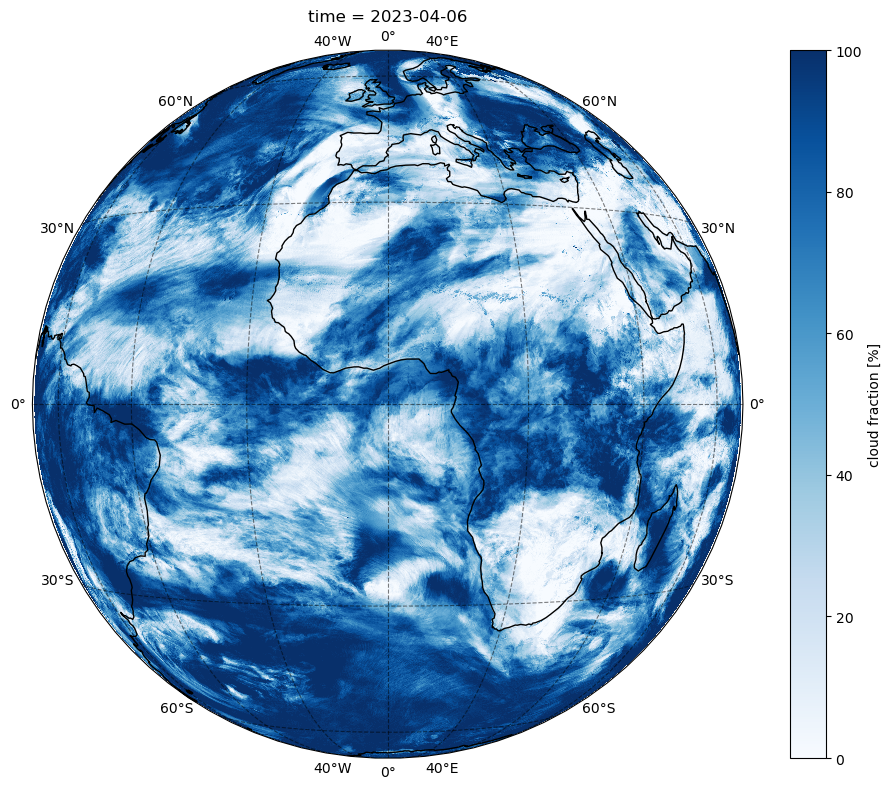

In [8]:
fig = plt.figure(figsize=(10,8))
colormap = 'Blues'

ax = plt.axes(projection= ccrs.Geostationary())

cfc_daily_mean.plot(transform=ccrs.PlateCarree(),cmap=colormap)

ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.8,
              color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.coastlines(color='black')
fig.tight_layout()
plt.savefig('../img/daily_CFC.png')
plt.show()

### 2) draw temporal-averaged map of monthly/seasonal CTP over the Iberian Peninsula and make time series of monthly CTP over a specified location

#### 2-1) Plot temporal average of monthly mean CTP

Extract 'ctp' variable

In [9]:
ctp_mm = ds_l3_mm_ctp['ctp']    
ctp_mm

<xarray.DataArray 'ctp' (time: 231, lat: 219, lon: 318)>
[16087302 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -10.93 -10.88 -10.82 -10.77 ... 4.825 4.875 4.925
  * lat      (lat) float64 34.03 34.08 34.12 34.17 ... 44.78 44.83 44.88 44.92
  * time     (time) datetime64[ns] 2004-01-01 2004-02-01 ... 2023-03-01
Attributes:
    units:          hPa
    standard_name:  air_pressure_at_cloud_top
    long_name:      cloud top pressure
    cmsaf_info:     cmsafops::box_mergetime for variable ctp

Average cloud top pressure over the Iberian Peninsula and plot it in a PlateCarree projection (equidistant cylindrical projection)

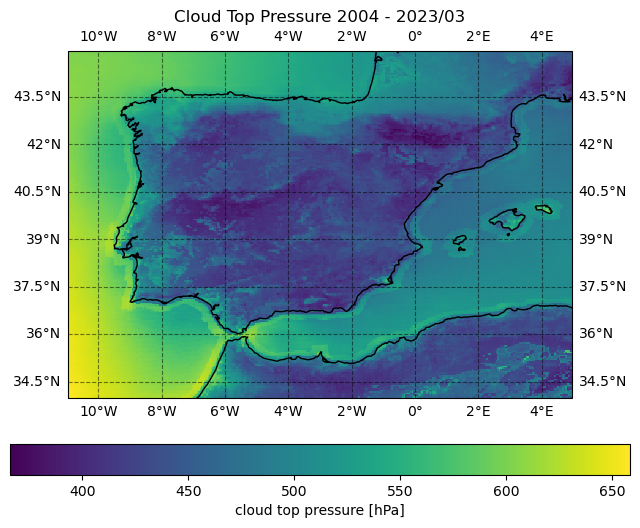

In [10]:
ctp_avg = ctp_mm.mean(dim='time')

fig=plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
map_eur = ctp_avg.plot(ax = ax, add_colorbar=False)
cbar = plt.colorbar(map_eur,shrink = 0.8, pad = 0.1, orientation='horizontal',label='cloud top pressure [hPa]')
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.8,
              color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.coastlines(color='black')
ax.set_title('Cloud Top Pressure 2004 - 2023/03')
plt.savefig('../img/Monthly_CTP.png')
plt.show()

#### 2-2) Compute seasonal averages, plot and compare

Group data set by seasons and compute an average of each 3 months within a season

In [11]:
ctp_avg_seasons = ctp_mm.groupby('time.season').mean(dim="time")
ctp_avg_seasons

<xarray.DataArray 'ctp' (season: 4, lat: 219, lon: 318)>
array([[[610.531  , 611.0914 , 611.1792 , ..., 486.24142, 472.3431 ,
         467.04315],
        [609.6361 , 609.4121 , 608.8414 , ..., 484.05008, 566.6398 ,
         561.56726],
        [609.5104 , 608.8879 , 608.73285, ..., 557.4568 , 569.02924,
         571.40173],
        ...,
        [569.3465 , 569.1966 , 569.5276 , ..., 505.0276 , 511.99838,
         506.33957],
        [569.1638 , 569.38104, 569.8914 , ..., 482.31375, 492.7725 ,
         511.08972],
        [569.51044, 569.77936, 569.9344 , ..., 500.1465 , 502.16724,
         505.30344]],

       [[808.7229 , 806.85974, 807.4928 , ..., 472.10522, 440.6842 ,
         427.70346],
        [806.76154, 806.84564, 806.62445, ..., 417.16663, 467.14905,
         465.78583],
        [808.3334 , 805.26324, 805.428  , ..., 441.97192, 462.23505,
         443.63858],
...
        [595.94836, 595.15173, 595.5482 , ..., 437.73795, 441.36206,
         435.5793 ],
        [595.4828 , 595.612  , 595.39996, ..., 419.16727, 420.7362 ,
         437.3225 ],
        [595.1398 , 594.79486, 595.5345 , ..., 438.44485, 429.10175,
         431.76736]],

       [[602.2281 , 601.07367, 599.15625, ..., 453.42276, 435.67197,
         422.74036],
        [599.5052 , 599.8981 , 598.00885, ..., 424.02982, 483.31757,
         477.87894],
        [599.7965 , 598.69305, 598.0124 , ..., 455.2211 , 478.4053 ,
         475.0877 ],
        ...,
        [588.67194, 588.3948 , 588.5141 , ..., 446.98425, 450.63327,
         447.71225],
        [588.72473, 588.4684 , 588.5191 , ..., 423.7648 , 431.0561 ,
         447.9648 ],
        [588.1703 , 588.4912 , 588.44916, ..., 440.8245 , 432.97903,
         443.43683]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -10.93 -10.88 -10.82 -10.77 ... 4.825 4.875 4.925
  * lat      (lat) float64 34.03 34.08 34.12 34.17 ... 44.78 44.83 44.88 44.92
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    units:          hPa
    standard_name:  air_pressure_at_cloud_top
    long_name:      cloud top pressure
    cmsaf_info:     cmsafops::box_mergetime for variable ctp

Plot seasonal averages as subplots

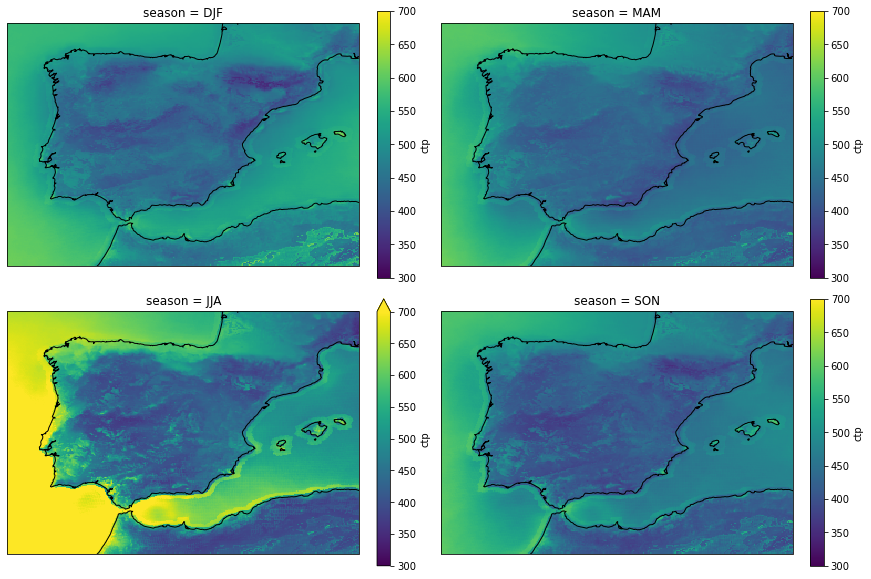

In [15]:
fig, axes = plt.subplots(ncols=2,nrows=2, figsize=(12,8), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ax_i = axes.flatten()[i]
    ctp_avg_seasons.sel(season=season).plot(ax=ax_i, transform=ccrs.PlateCarree(), add_colorbar=True,
                                           vmin=300,vmax=700)
    ax_i.coastlines(color='black')
plt.show()

#### 2-3) Plot time series of cloud top pressure over Madrid

In [12]:
# Choose grid box with Madrid
location = 'Madrid'
latitude = 40.4189
longitude = -3.6919

ctp_mm_1gridbox = ctp_mm.sel(lat= latitude, lon= longitude, method='nearest')
ctp_mm_1gridbox

<xarray.DataArray 'ctp' (time: 231)>
array([      nan, 413.4    , 436.30002, ..., 505.     , 522.2    , 391.5    ],
      dtype=float32)
Coordinates:
    lon      float64 -3.675
    lat      float64 40.42
  * time     (time) datetime64[ns] 2004-01-01 2004-02-01 ... 2023-03-01
Attributes:
    units:          hPa
    standard_name:  air_pressure_at_cloud_top
    long_name:      cloud top pressure
    cmsaf_info:     cmsafops::box_mergetime for variable ctp

Text(0.5, 1.0, 'Cloud top pressure over Madrid Monthly means 2004 - 2023/03.')

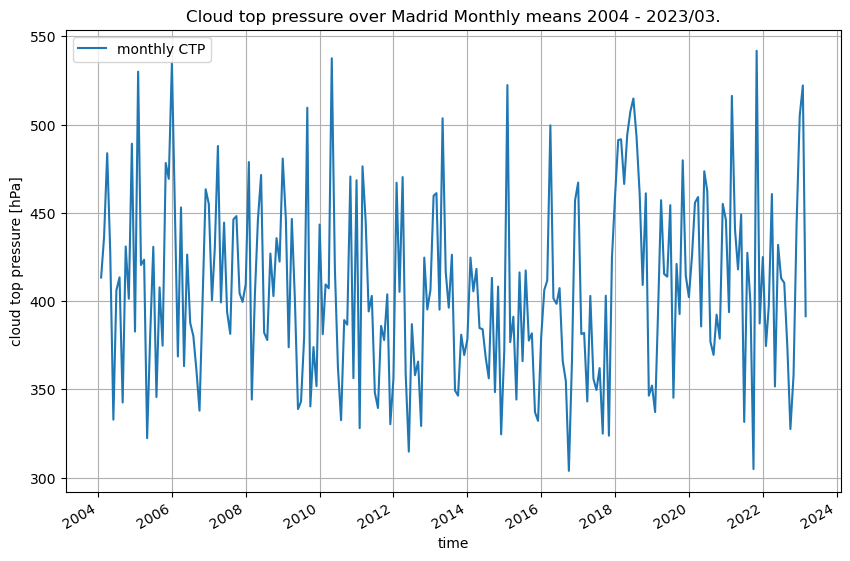

In [13]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ctp_mm_1gridbox.plot(ax=ax, label='monthly CTP')
ax.grid()
ax.legend()
ax.set_title('Cloud top pressure over '+location+' Monthly means 2004 - 2023/03.')

### 3) plot diurnal cycle of fraction of liquid clouds (CPH) for a specifid location and plot CPH at midday over Europe

#### 3-1) Plot long-term mean diurnal Cycle over Madrid

Exctract 'cph_mmdc' variable from ds_l3_cph_md

In [14]:
cph_md = ds_l3_cph_md['cph_mmdc']
cph_md

<xarray.DataArray 'cph_mmdc' (time: 5544, lat: 151, lon: 278)>
[232726032 values with dtype=float32]
Coordinates:
  * lon      (lon) float64 -24.62 -24.38 -24.12 -23.88 ... 44.12 44.38 44.62
  * lat      (lat) float64 34.12 34.38 34.62 34.88 ... 70.88 71.12 71.38 71.62
  * time     (time) datetime64[ns] 2004-01-01 ... 2023-03-01T23:00:00
Attributes:
    units:          %
    standard_name:  undefined
    long_name:      fraction of liquid water clouds monthly mean diurnal cycl...
    cmsaf_info:     cmsafops::box_mergetime for variable cph_mmdc

Find a gridbox with Madrid

In [15]:
location = 'Madrid'
latitude = 40.4189
longitude = -3.6919

cph_md_1gridbox = cph_md.sel(lat= latitude, lon= longitude, method='nearest')

Compute a long-term average for each hour of the day

In [16]:
cph_md_1gridbox_avg = cph_md_1gridbox.groupby('time.hour').mean()
cph_md_1gridbox_avg

<xarray.DataArray 'cph_mmdc' (hour: 24)>
array([49.29565 , 49.239132, 50.68261 , 51.352173, 51.808697, 48.052174,
       44.95652 , 43.633186, 46.604347, 51.769566, 56.895653, 58.695652,
       59.469566, 57.513042, 53.691303, 50.      , 47.49565 , 48.904346,
       50.33478 , 50.726086, 51.756523, 51.49565 , 50.695652, 49.64348 ],
      dtype=float32)
Coordinates:
    lon      float64 -3.625
    lat      float64 40.38
  * hour     (hour) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23
Attributes:
    units:          %
    standard_name:  undefined
    long_name:      fraction of liquid water clouds monthly mean diurnal cycl...
    cmsaf_info:     cmsafops::box_mergetime for variable cph_mmdc

The prepared product has monthly averaged CPH values for each hour of the day, just plot it as a line.

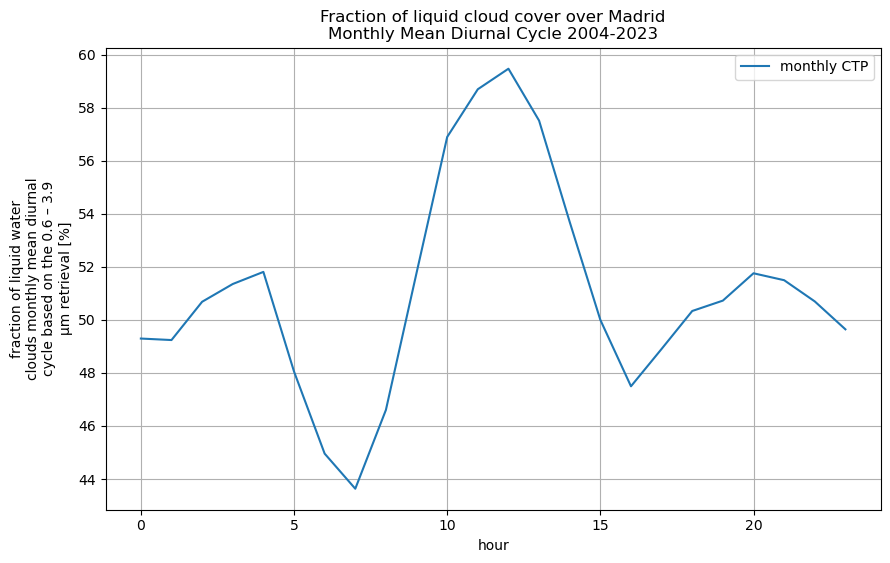

In [17]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
cph_md_1gridbox_avg.plot(ax=ax, label='monthly CTP')
ax.grid()
ax.legend()
plt.title('Fraction of liquid cloud cover over '+location+'\nMonthly Mean Diurnal Cycle 2004-2023')
plt.show()

#### 3-2) Plot a map of liquid cloud fraction at midday

Extract monthly CPH at midday (12 UTC) 

In [18]:
cph_md_12 = cph_md.sel(time=(cph_md.time.dt.hour == 12))

Average all monthly mean values at midday

In [19]:
cph_md_12_avg = cph_md_12.mean(dim='time')

Plot a map of CPH

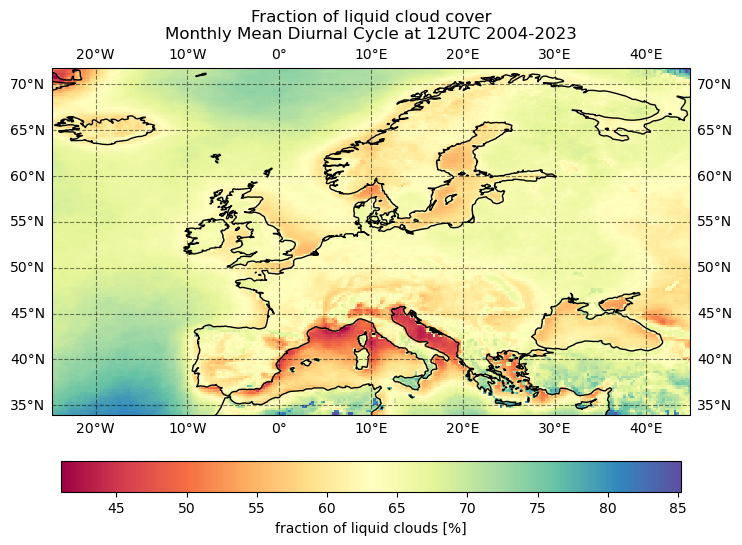

In [20]:
fig=plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
colormap = 'Spectral'
map_eur = cph_md_12_avg.plot(ax = ax, transform=ccrs.PlateCarree(), cmap=colormap, add_colorbar=False)
cbar = plt.colorbar(map_eur,shrink = 0.8, pad = 0.1, orientation='horizontal',label='fraction of liquid clouds [%]')
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.8,
              color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.coastlines(color='black')
plt.title('Fraction of liquid cloud cover\nMonthly Mean Diurnal Cycle at 12UTC 2004-2023')
plt.show()

<hr>

### **Further tasks**

#### This section contains further tasks for analysing CLAAS-3 data. The same products and the same variables can be used.

### 1.1) Plot cloud fraction over Europe or another region of your choice using daily mean data on 2020/07/15
- extract variable to plot
- cut region you interested in
- plot on a map

In [21]:
cfc_daily_mean = ds_l3_dm_cfc['cfc']

In [22]:
lats_europe = slice(34, 72)
lons_europe = slice(-25, 45)
cfc_daily_mean_eur = cfc_daily_mean.sel(lat=lats_europe).sel(lon=lons_europe)

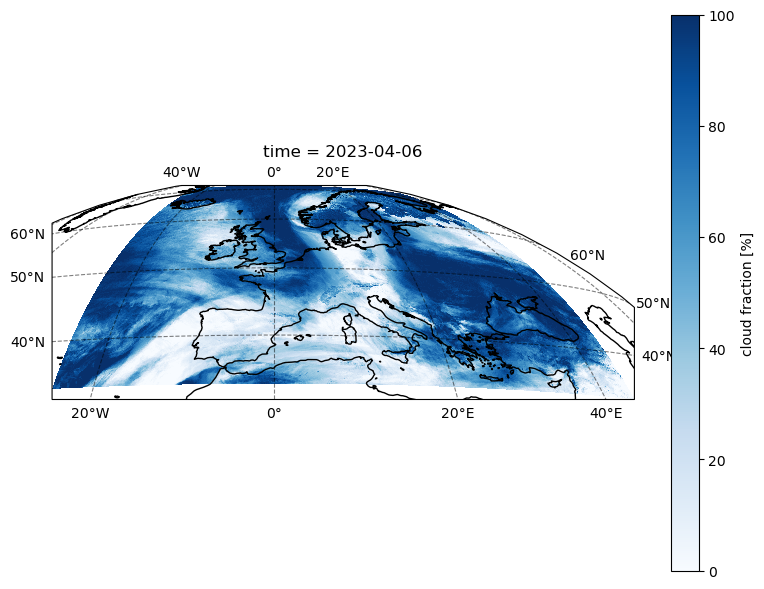

In [23]:
fig = plt.figure(figsize=(8,6))
colormap = 'Blues'

ax = plt.axes(projection= ccrs.Geostationary())

cfc_daily_mean_eur.plot(transform=ccrs.PlateCarree(),cmap=colormap)

ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.8,
              color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.coastlines(color='black')
fig.tight_layout()
plt.show()

### 1.2) Plot cloud fraction over Europe or another region of your choice using different projection using daily mean data on 2020/07/15
- extract variable to plot
- cut region you interested in
- define a projection for plot, e.g. Stereographic (list of projections: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)
- plot on a map

In [24]:
cfc_daily_mean = ds_l3_dm_cfc['cfc']

In [25]:
lats_europe = slice(34, 72)
lons_europe = slice(-25, 45)
cfc_daily_mean_eur = cfc_daily_mean.sel(lat=lats_europe).sel(lon=lons_europe)

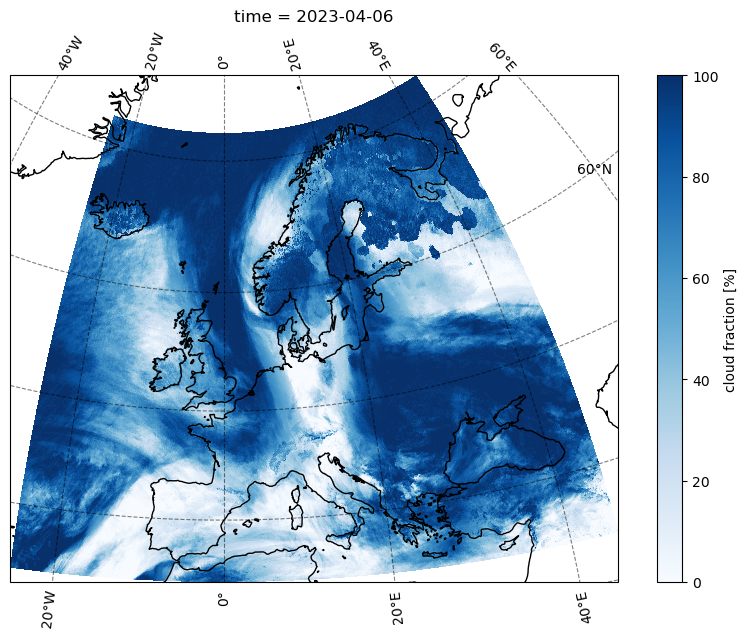

In [26]:
fig = plt.figure(figsize=(8,6))
colormap = 'Blues'

ax = plt.axes(projection= ccrs.Stereographic())

cfc_daily_mean_eur.plot(transform=ccrs.PlateCarree(),cmap=colormap)

ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.8,
              color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.coastlines(color='black')
fig.tight_layout()
plt.show()

### 2.1) Draw temporal-averaged map of CTP over the Iberain Peninsula for each month
- extract variable to plot
- group data by month and compute an average of all monthly means on a specific month
- make a plot of 12 subplots for each month: use the same limits for each subplot, use months' names to title subplots

In [27]:
ctp_mm = ds_l3_mm_ctp['ctp']

In [28]:
ctp_avg_months = ctp_mm.groupby('time.month').mean(dim="time")
ctp_avg_months

<xarray.DataArray 'ctp' (month: 12, lat: 219, lon: 318)>
array([[[622.5054 , 622.28424, 623.5474 , ..., 492.4789 , 480.221  ,
         474.3842 ],
        [622.33685, 622.69476, 620.02637, ..., 488.64206, 583.8158 ,
         576.41583],
        [623.70526, 623.3579 , 621.30524, ..., 568.92633, 586.1263 ,
         588.05255],
        ...,
        [573.0632 , 572.94745, 572.7736 , ..., 504.40002, 512.74207,
         510.6947 ],
        [573.83167, 573.89996, 573.3684 , ..., 485.5948 , 493.7316 ,
         514.98944],
        [573.5737 , 573.7316 , 573.81586, ..., 503.1105 , 504.88956,
         506.78946]],

       [[612.45496, 612.84503, 612.2701 , ..., 500.24503, 477.6    ,
         477.285  ],
        [611.24005, 611.6    , 611.085  , ..., 487.09503, 549.875  ,
         552.07   ],
        [610.81995, 609.54504, 610.19   , ..., 551.0851 , 560.395  ,
         561.07   ],
...
        [579.51575, 580.33154, 580.0368 , ..., 478.51578, 479.48422,
         475.95267],
        [579.7684 , 580.2737 , 579.95795, ..., 454.6842 , 461.36307,
         478.59998],
        [579.32635, 579.45264, 579.1526 , ..., 471.8474 , 466.7579 ,
         474.64206]],

       [[596.5316 , 598.0526 , 597.6632 , ..., 465.26315, 458.93155,
         448.92105],
        [595.24744, 593.82635, 595.29474, ..., 476.25262, 567.1105 ,
         556.7158 ],
        [593.9368 , 593.7263 , 594.62634, ..., 552.6948 , 561.021  ,
         565.6264 ],
        ...,
        [552.0421 , 552.16846, 552.2106 , ..., 517.0474 , 520.03156,
         516.24207],
        [551.34735, 552.0422 , 552.67365, ..., 487.76846, 503.3105 ,
         519.779  ],
        [551.92633, 552.479  , 553.1525 , ..., 508.78418, 516.19995,
         516.4263 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -10.93 -10.88 -10.82 -10.77 ... 4.825 4.875 4.925
  * lat      (lat) float64 34.03 34.08 34.12 34.17 ... 44.78 44.83 44.88 44.92
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:          hPa
    standard_name:  air_pressure_at_cloud_top
    long_name:      cloud top pressure
    cmsaf_info:     cmsafops::box_mergetime for variable ctp

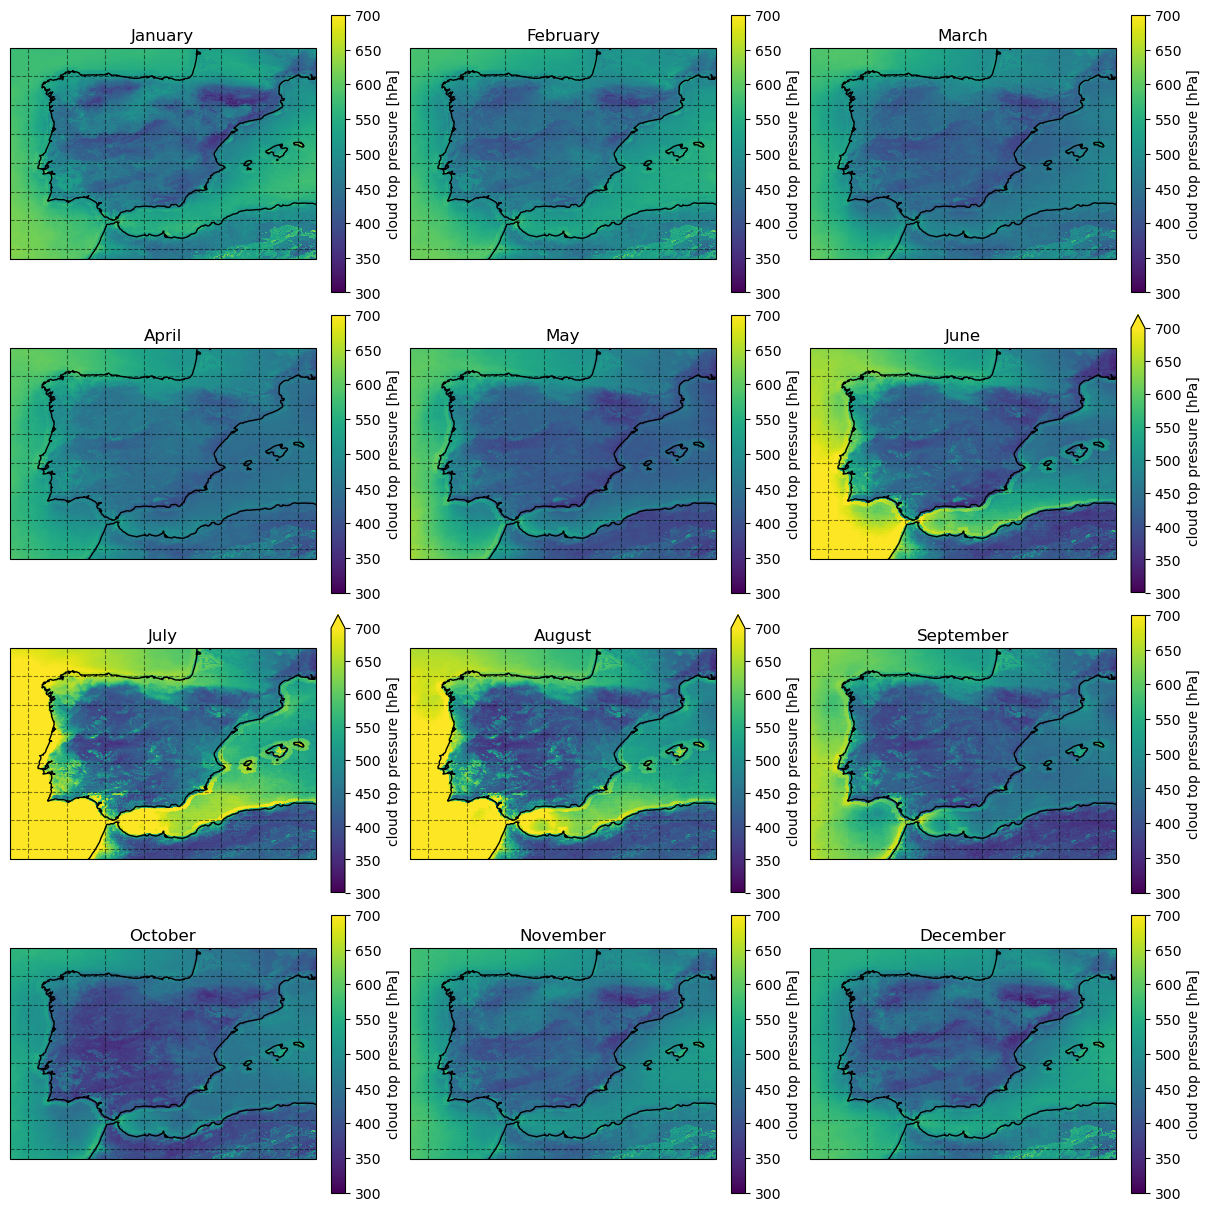

In [29]:
fig, axes = plt.subplots(ncols=3,nrows=4, figsize=(12,12), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)
for i, mon in enumerate(range(1,13)):
    ax_i = axes.flatten()[i]
    ctp_avg_months.sel(month=mon).plot(ax=ax_i, transform=ccrs.PlateCarree(), add_colorbar=True,
                                           vmin=300,vmax=700)
    ax_i.gridlines(crs=ccrs.PlateCarree(), linewidth=0.8,
                  color='black', alpha=0.5, linestyle='--', draw_labels=False)
    ax_i.coastlines(color='black')
    ax_i.set_title(calendar.month_name[mon])

### 2.2) Plot time series of cloud top pressure over a selected point
- define geografical coordinates of point of your choise on the Iberian Peninsula, here Valencia
- find a CLAAS-3 grid box with defined coordinates 
- plot time series of CTP

In [30]:
location = 'Valencia'
latitude = 39.466667
longitude = -0.375

ctp_mm_1gridbox = ctp_mm.sel(lat= latitude, lon= longitude, method='nearest')

Text(0.5, 1.0, 'Cloud top pressure over Valencia 2004 - 2020.')

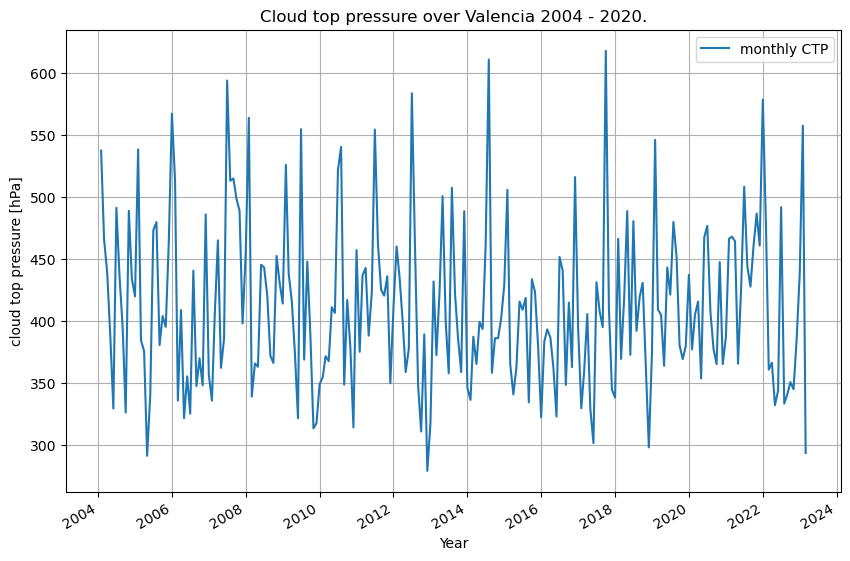

In [31]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ctp_mm_1gridbox.plot(ax=ax, label='monthly CTP')
ax.set_xlabel('Year')
ax.grid()
ax.legend()
ax.set_title('Cloud top pressure over '+location+' 2004 - 2020.')

### 2.3) Compute annual mean and plot it together with the monthly-based time series of cloud top pressure over a selected point
- choose only complete years
- compute annual average
- plot monthly and annualy time series of CTP in one plot

In [32]:
ctp_mm_1gridbox = ctp_mm_1gridbox.sel(time=slice('2004','2022'))
ctp_mm_1gridbox

<xarray.DataArray 'ctp' (time: 228)>
array([      nan, 537.10004, 465.7    , ..., 350.6    , 344.9    , 384.     ],
      dtype=float32)
Coordinates:
    lon      float64 -0.375
    lat      float64 39.47
  * time     (time) datetime64[ns] 2004-01-01 2004-02-01 ... 2022-12-01
Attributes:
    units:          hPa
    standard_name:  air_pressure_at_cloud_top
    long_name:      cloud top pressure
    cmsaf_info:     cmsafops::box_mergetime for variable ctp

In [33]:
ctp_mm_1gridbox_annual = ctp_mm_1gridbox.resample(time="Y").mean() # resample == groupby 
ctp_mm_1gridbox_annual

<xarray.DataArray 'ctp' (time: 19)>
array([429.98184, 412.0167 , 401.475  , 443.03333, 417.94165, 406.72498,
       398.25833, 430.69998, 401.     , 413.63333, 402.55835, 401.38333,
       391.95834, 393.725  , 403.03333, 418.53336, 407.78336, 447.0167 ,
       391.94998], dtype=float32)
Coordinates:
    lon      float64 -0.375
    lat      float64 39.47
  * time     (time) datetime64[ns] 2004-12-31 2005-12-31 ... 2022-12-31
Attributes:
    units:          hPa
    standard_name:  air_pressure_at_cloud_top
    long_name:      cloud top pressure
    cmsaf_info:     cmsafops::box_mergetime for variable ctp

Text(0.5, 1.0, 'Cloud top pressure over Valencia 2004 - 2022.')

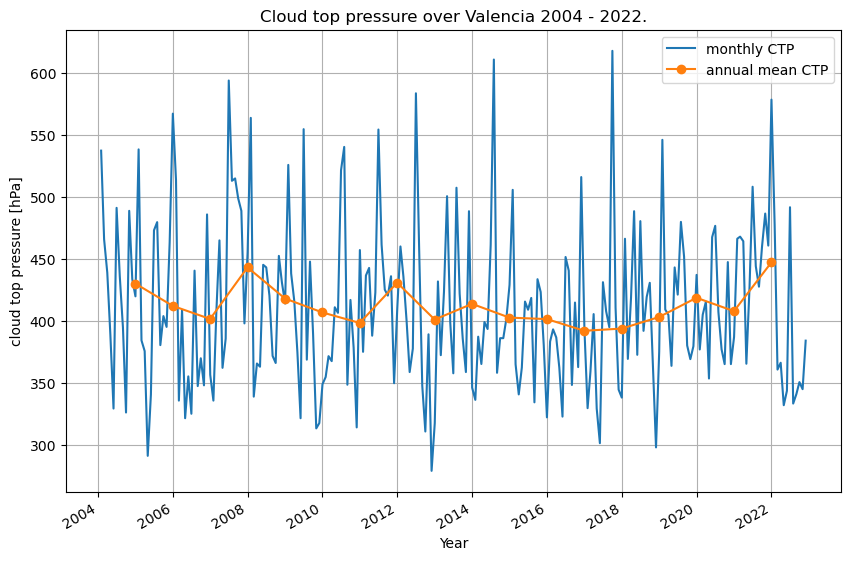

In [34]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
ctp_mm_1gridbox.plot(ax=ax, label='monthly CTP')
ctp_mm_1gridbox_annual[:-1].plot(ax=ax, label='annual mean CTP', color='tab:orange', marker='o')
ax.set_xlabel('Year')
ax.grid()
ax.legend()
ax.set_title('Cloud top pressure over '+location+' 2004 - 2022.')

### 2.4) Weighted annual average and linear trend over a selected location
- define annual mean by a proper weighting operation of monthly values
    - find length of each month in the time range 
    - compute the weight to associate to each month
    - compute annual mean applying weights
- compute linear trend
    - retrieve *year* variable
    - find the slope and intercept using fuction *linregress* from Scipy library
    - plot annual means and linear trend in one plot

In [35]:
# ---- getting length of each month ----
month_length = ctp_mm_1gridbox.time.dt.days_in_month
month_length

<xarray.DataArray 'days_in_month' (time: 228)>
array([31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31,
       30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31,
       30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31,
       30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31,
       28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30,
       31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30,
       31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30,
       31, 30, 31, 31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30,
       31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28,
       31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31,
       31, 30, 31, 30, 31, 31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31,
       31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28, 31, 30, 31,
       30, 31, 31, 30, 31, 30, 31])
Coordinates:
    lon      float64 -0.375
    lat      float64 39.47
  * time     (time) datetime64[ns] 2004-01-01 2004-02-01 ... 2022-12-01

In [36]:
# ---- computing weights ----
wgts = month_length.groupby("time.year") / month_length.groupby("time.year").mean()
wgts

<xarray.DataArray 'days_in_month' (time: 228)>
array([1.01639344, 0.95081967, 1.01639344, 0.98360656, 1.01639344,
       0.98360656, 1.01639344, 1.01639344, 0.98360656, 1.01639344,
       0.98360656, 1.01639344, 1.01917808, 0.92054795, 1.01917808,
       0.98630137, 1.01917808, 0.98630137, 1.01917808, 1.01917808,
       0.98630137, 1.01917808, 0.98630137, 1.01917808, 1.01917808,
       0.92054795, 1.01917808, 0.98630137, 1.01917808, 0.98630137,
       1.01917808, 1.01917808, 0.98630137, 1.01917808, 0.98630137,
       1.01917808, 1.01917808, 0.92054795, 1.01917808, 0.98630137,
       1.01917808, 0.98630137, 1.01917808, 1.01917808, 0.98630137,
       1.01917808, 0.98630137, 1.01917808, 1.01639344, 0.95081967,
       1.01639344, 0.98360656, 1.01639344, 0.98360656, 1.01639344,
       1.01639344, 0.98360656, 1.01639344, 0.98360656, 1.01639344,
       1.01917808, 0.92054795, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808, 1.01917808, 0.92054795, 1.01917808,
       0.98630137, 1.01917808, 0.98630137, 1.01917808, 1.01917808,
       0.98630137, 1.01917808, 0.98630137, 1.01917808, 1.01917808,
       0.92054795, 1.01917808, 0.98630137, 1.01917808, 0.98630137,
       1.01917808, 1.01917808, 0.98630137, 1.01917808, 0.98630137,
       1.01917808, 1.01639344, 0.95081967, 1.01639344, 0.98360656,
...
       0.98630137, 1.01917808, 1.01917808, 0.92054795, 1.01917808,
       0.98630137, 1.01917808, 0.98630137, 1.01917808, 1.01917808,
       0.98630137, 1.01917808, 0.98630137, 1.01917808, 1.01639344,
       0.95081967, 1.01639344, 0.98360656, 1.01639344, 0.98360656,
       1.01639344, 1.01639344, 0.98360656, 1.01639344, 0.98360656,
       1.01639344, 1.01917808, 0.92054795, 1.01917808, 0.98630137,
       1.01917808, 0.98630137, 1.01917808, 1.01917808, 0.98630137,
       1.01917808, 0.98630137, 1.01917808, 1.01917808, 0.92054795,
       1.01917808, 0.98630137, 1.01917808, 0.98630137, 1.01917808,
       1.01917808, 0.98630137, 1.01917808, 0.98630137, 1.01917808,
       1.01917808, 0.92054795, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808, 1.01917808, 0.98630137, 1.01917808,
       0.98630137, 1.01917808, 1.01639344, 0.95081967, 1.01639344,
       0.98360656, 1.01639344, 0.98360656, 1.01639344, 1.01639344,
       0.98360656, 1.01639344, 0.98360656, 1.01639344, 1.01917808,
       0.92054795, 1.01917808, 0.98630137, 1.01917808, 0.98630137,
       1.01917808, 1.01917808, 0.98630137, 1.01917808, 0.98630137,
       1.01917808, 1.01917808, 0.92054795, 1.01917808, 0.98630137,
       1.01917808, 0.98630137, 1.01917808, 1.01917808, 0.98630137,
       1.01917808, 0.98630137, 1.01917808])
Coordinates:
    lon      (time) float64 -0.375 -0.375 -0.375 -0.375 ... -0.375 -0.375 -0.375
    lat      (time) float64 39.47 39.47 39.47 39.47 ... 39.47 39.47 39.47 39.47
  * time     (time) datetime64[ns] 2004-01-01 2004-02-01 ... 2022-12-01
    year     (time) int64 2004 2004 2004 2004 2004 ... 2022 2022 2022 2022 2022

In [37]:
# ---- computing weighted average ----
ctp_mean = (ctp_mm_1gridbox * wgts).resample(time="AS").mean(dim="time")
ctp_mean

<xarray.DataArray (time: 19)>
array([428.90701426, 411.40850161, 400.95754052, 443.69178785,
       417.24754759, 406.10083292, 398.86904414, 431.1479524 ,
       400.92295596, 413.62658349, 403.39754028, 400.77918108,
       392.40847745, 394.42329127, 402.62000716, 417.5030184 ,
       407.74426436, 446.81232977, 391.71863479])
Coordinates:
  * time     (time) datetime64[ns] 2004-01-01 2005-01-01 ... 2022-01-01

In [38]:
# ---- variable Year extraction----
dates = pd.DatetimeIndex(ctp_mean.time)
dates.year

Int64Index([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

In [39]:
# ---- retrieving the linear trend ----
y = ctp_mean.values
x = np.array(dates.year)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
ann_lin_trend = intercept + slope*x

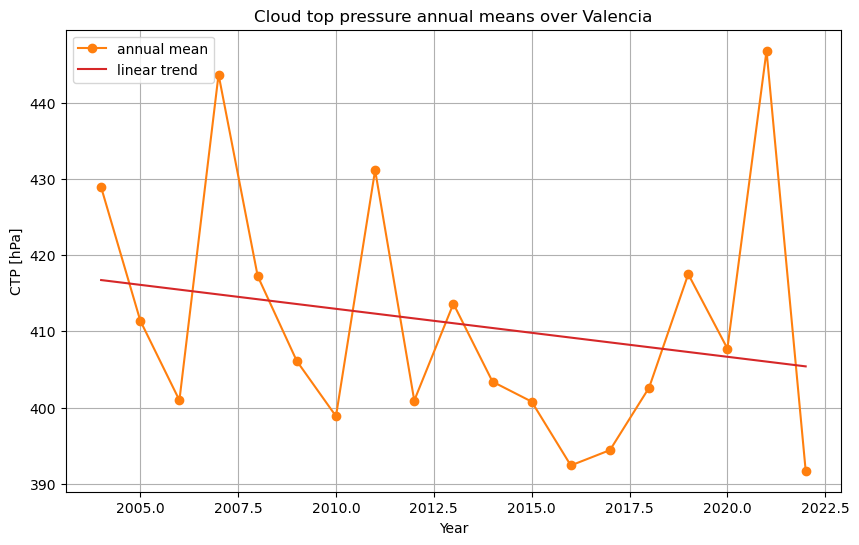

In [40]:
#----- data visualization ------
plt.figure(figsize=(10,6))
plt.plot(dates.year,ctp_mean.values, label = 'annual mean',color = 'tab:orange', marker='o')
plt.plot(dates.year,ann_lin_trend, label = 'linear trend', color = 'tab:red')
plt.title('Cloud top pressure annual means over '+location, fontsize = 12)
plt.xlabel('Year')
plt.ylabel('CTP [hPa]')
plt.grid()
plt.legend()
plt.show()

### 2.5) Monthly anomalies and linear trend over a selected location
- group the available data by month
- calculate anomalies as the subtraction : **monthly values** - **monthly climatology** 
- remove not-valid values
- calculate linear trend
- plot anomalies and linear trend in one plot

In [41]:
monthly_values = ctp_mm_1gridbox.groupby('time.month')
monthly_climatology = ctp_mm_1gridbox.groupby('time.month').mean()

In [42]:
anomalies = monthly_values - monthly_climatology
anomalies

<xarray.DataArray 'ctp' (time: 228)>
array([         nan,   88.58951  ,   70.95264  ,   35.13684  ,
         14.515778 ,  -53.34735  ,   15.9263   ,  -14.50528  ,
          2.421051 ,  -80.50528  ,   86.40527  ,   39.42105  ,
         11.283325 ,   89.58951  ,  -10.547363 ,  -28.063171 ,
        -83.28421  ,  -41.947357 ,   -2.173706 ,   28.99472  ,
        -11.778961 ,   -2.8052673,   -7.0947266,   68.821045 ,
        158.48334  ,   64.78946  ,  -59.047363 ,    5.0368347,
        -52.984222 ,  -27.447357 , -149.9737   ,  -10.105286 ,
        -44.77896  ,  -36.805267 ,  -54.194733 ,   91.52106  ,
        -51.916687 , -112.81052  ,   10.652618 ,   61.13684  ,
        -12.384216 ,    3.0526428,  118.52634  ,   62.29471  ,
        122.52106  ,   91.99472  ,   86.40527  ,    3.7210388,
         46.68332  ,  114.98947  ,  -55.84738  ,  -38.06317  ,
        -11.484222 ,   62.452637 ,  -32.0737   ,  -30.205261 ,
        -20.478943 ,  -40.605286 ,   50.105286 ,   36.621063 ,
          5.483307 ,   77.08951  ,   43.35263  ,   11.936829 ,
          0.2157898,  -61.14737  ,   79.326324 ,  -81.80527  ,
         55.521057 ,  -17.00528  ,  -88.894714 ,  -76.57895  ,
        -59.516693 ,  -93.81052  ,  -23.247375 ,  -36.163177 ,
         36.41577  ,   23.752625 ,   46.226288 ,   89.59476  ,
...
        -43.878937 ,    8.094727 ,  -39.49472  ,  121.62103  ,
        -15.016693 , -118.91052  ,  -35.547363 ,    1.7368164,
        -45.184204 ,  -81.247375 ,  -43.973694 ,  -42.805267 ,
          2.7210388,  210.89471  ,    8.50528  ,  -49.678955 ,
        -70.31668  ,   17.589478 ,  -25.447357 ,   14.936829 ,
        113.815796 ,  -10.047363 ,    5.2263184,  -58.605286 ,
         27.021057 ,   23.99472  ,  -38.79474  ,  -96.178955 ,
        -33.416687 ,   97.28946  ,   14.352631 ,    1.0368347,
        -10.78421  ,   60.35263  ,  -53.973694 ,   29.194733 ,
         59.42105  ,  -26.50528  ,  -33.094727 ,  -14.678955 ,
         28.583313 ,  -71.610535 ,   10.152618 ,   11.8368225,
        -20.984222 ,   84.752625 ,    1.4263   ,  -43.305267 ,
        -15.178955 ,  -41.50528  ,   45.105286 ,  -29.078949 ,
        -21.416687 ,   17.589478 ,   73.05264  ,   60.43683  ,
         -9.0842285,   44.752625 ,   32.9263   ,   -6.5052795,
         35.321045 ,   53.29471  ,   84.20526  ,   66.42105  ,
        169.78333  ,   28.989471 ,  -34.047363 ,  -37.463165 ,
        -42.484222 ,  -39.047363 ,   16.4263   , -117.20526  ,
        -51.27896  ,  -56.00528  ,  -57.29474  ,  -10.178955 ],
      dtype=float32)
Coordinates:
    lon      (time) float64 -0.375 -0.375 -0.375 -0.375 ... -0.375 -0.375 -0.375
    lat      (time) float64 39.47 39.47 39.47 39.47 ... 39.47 39.47 39.47 39.47
  * time     (time) datetime64[ns] 2004-01-01 2004-02-01 ... 2022-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [43]:
# ---- retrieving the linear trend ----
y = anomalies.values[1:]
x_time = anomalies.time[1:]
x = np.arange(0,np.shape(y)[0],1,dtype = int)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
lin_trend = intercept + slope*x

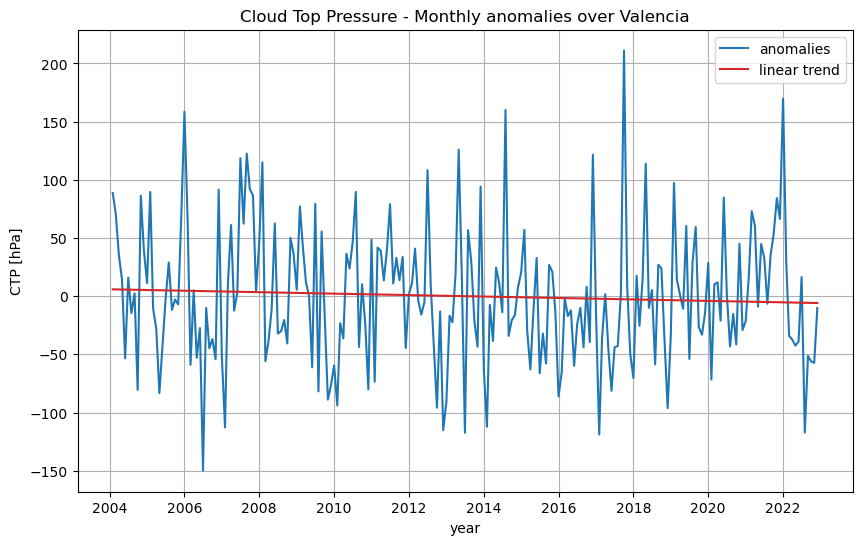

In [44]:
#----- data visualization ------
plt.figure(figsize= (10,6))
plt.xlabel('year')
plt.ylabel('CTP [hPa]')
plt.plot(x_time,y,color='tab:blue', label = 'anomalies')
plt.plot(x_time,lin_trend,color='tab:red', label = 'linear trend')
plt.title('Cloud Top Pressure - Monthly anomalies over '+location, fontsize=12)
plt.grid()
plt.legend()
plt.show()

### 3.1) Compare long-term monthly mean diurnal cycle of CPH over specifies location in January and July 
- extract variable to plot
- specify location
- choose values for July and for January
- average values
- plot both diurnal cycles in one plot

In [45]:
cph_md = ds_l3_cph_md['cph_mmdc']

In [46]:
location = 'Valencia'
latitude = 39.466667
longitude = -0.375
cph_md_1gridbox = cph_md.sel(lat= latitude, lon= longitude, method='nearest')

In [47]:
cph_md_1gridbox_july = cph_md_1gridbox.sel(time=(cph_md.time.dt.month == 7))
cph_md_1gridbox_jan = cph_md_1gridbox.sel(time=(cph_md.time.dt.month == 1))

In [48]:
cph_md_1gridbox_july_avg = cph_md_1gridbox_july.groupby('time.hour').mean()
cph_md_1gridbox_jan_avg = cph_md_1gridbox_jan.groupby('time.hour').mean()

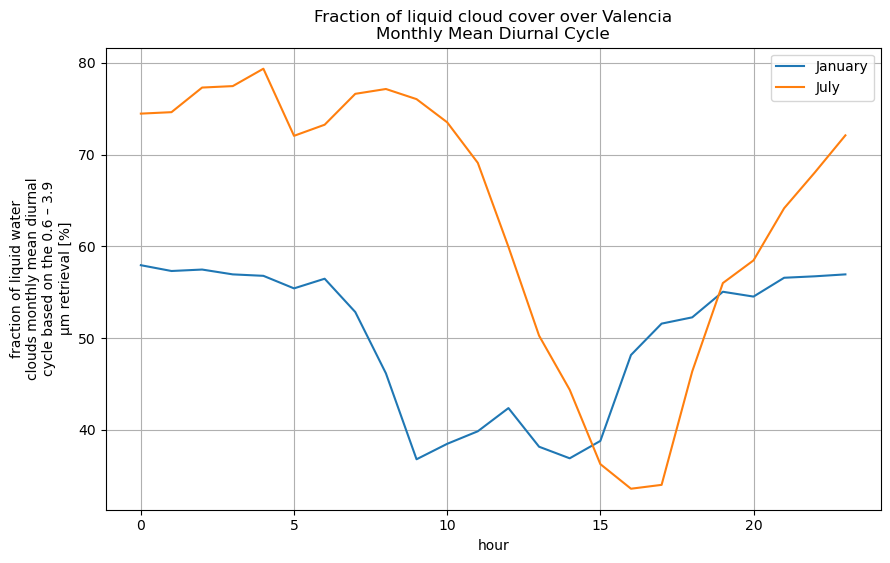

In [49]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
cph_md_1gridbox_jan_avg.plot(ax=ax, label='January')
cph_md_1gridbox_july_avg.plot(ax=ax, label='July')
ax.grid()
ax.legend()
plt.title('Fraction of liquid cloud cover over '+location+'\nMonthly Mean Diurnal Cycle')
plt.show()

### 3.2) Plot a map of long-term mean liquid cloufd fraction at midnight (0 UTC)
- extract monthly CPH at midnight (0 UTC) 
- average all monthly mean values at midnight
- plot a map of CPH

In [50]:
cph_md_00 = cph_md.sel(time=(cph_md.time.dt.hour == 0))

In [51]:
cph_md_00_avg = cph_md_00.mean(dim='time')

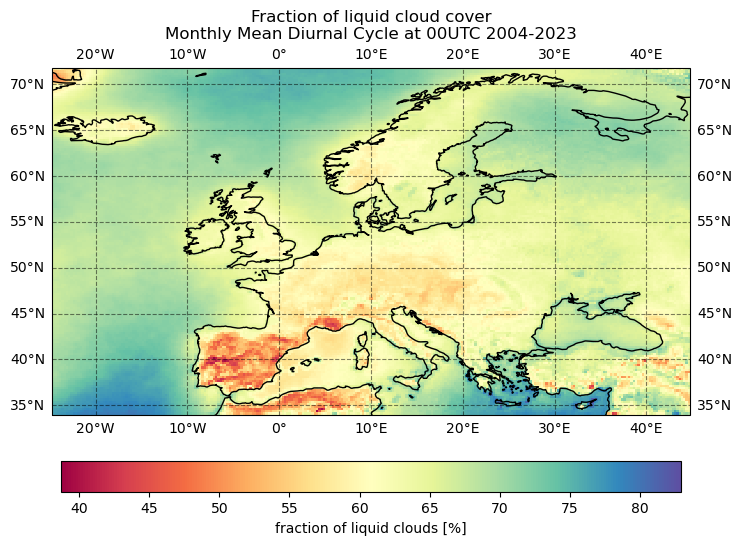

In [53]:
fig=plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
colormap = 'Spectral'
map_eur = cph_md_00_avg.plot(ax = ax, transform=ccrs.PlateCarree(), cmap=colormap, add_colorbar=False)
cbar = plt.colorbar(map_eur,shrink = 0.8, pad = 0.1, orientation='horizontal',label='fraction of liquid clouds [%]')
ax.gridlines(crs=ccrs.PlateCarree(), linewidth=0.8,
              color='black', alpha=0.5, linestyle='--', draw_labels=True)
ax.coastlines(color='black')
plt.title('Fraction of liquid cloud cover\nMonthly Mean Diurnal Cycle at 00UTC 2004-2023')
plt.savefig('../img/Monthly_CPH.png')
plt.show()

<hr>

<img src='https://git.services.meeo.it/ltpy/climate/-/raw/main/SMA2024_CM_SAF/img/CM_SAF_banner.png' align='center' width='100%'>